In [1]:
# تثبيت PySpark في Google Colab
!pip install pyspark


In [5]:
from pyspark.sql import SparkSession

# إنشاء SparkSession
spark = SparkSession.builder \
    .appName("Open Food Facts Analysis") \
    .getOrCreate()

# التحقق من أن الجلسة تعمل بشكل صحيح
spark.version


'3.5.1'

In [7]:
# تحميل بيانات Open Food Facts من ملف JSON إلى DataFrame
df = spark.read.json('en.openfoodfacts.org.products.json')

# عرض بعض السطور للتحقق من البيانات
df.show(10)


+--------------------------+--------------------+----------------------+------------------+------------------+-----------------+------------------+-------------------+------------------+---------------------------------+--------------------------+---------------------------+------------------+-----------------+--------------+--------------------------+-------------+------------------+-------------+-----------------+---------------------+-------------------+-------------------+-------------+---------------+-------------------+-------------------+-------------------+-------------------+----------------+-------------------+------------------+-------------+---------------+--------------------+------------------+-----------+--------------+------------+---------+------------+------------------+----------------+-----------+--------------------+--------------------+-------------+------------+------------------+---------------------+-----------+----------+-------------+---------------+---------

In [8]:
# عرض بعض المعلومات الأساسية حول البيانات
df.printSchema()

# عرض أول 5 صفوف من البيانات
df.show(5)


root
 |-- -alpha-linolenic-acid_100g: string (nullable = true)
 |-- -arachidic-acid_100g: string (nullable = true)
 |-- -arachidonic-acid_100g: string (nullable = true)
 |-- -behenic-acid_100g: string (nullable = true)
 |-- -butyric-acid_100g: string (nullable = true)
 |-- -capric-acid_100g: string (nullable = true)
 |-- -caproic-acid_100g: string (nullable = true)
 |-- -caprylic-acid_100g: string (nullable = true)
 |-- -cerotic-acid_100g: string (nullable = true)
 |-- -dihomo-gamma-linolenic-acid_100g: string (nullable = true)
 |-- -docosahexaenoic-acid_100g: string (nullable = true)
 |-- -eicosapentaenoic-acid_100g: string (nullable = true)
 |-- -elaidic-acid_100g: string (nullable = true)
 |-- -erucic-acid_100g: string (nullable = true)
 |-- -fructose_100g: string (nullable = true)
 |-- -gamma-linolenic-acid_100g: string (nullable = true)
 |-- -glucose_100g: string (nullable = true)
 |-- -gondoic-acid_100g: string (nullable = true)
 |-- -lactose_100g: string (nullable = true)
 |-- -

In [9]:
# التحقق من القيم المفقودة في كل عمود
df.select([df[col].isNull().alias(col) for col in df.columns]).show()


+--------------------------+--------------------+----------------------+------------------+------------------+-----------------+------------------+-------------------+------------------+---------------------------------+--------------------------+---------------------------+------------------+-----------------+--------------+--------------------------+-------------+------------------+-------------+-----------------+---------------------+-------------------+-------------------+-------------+---------------+-------------------+-------------------+-------------------+-------------------+----------------+-------------------+------------------+-------------+---------------+---------+------------+-----------+--------------+------------+---------+------------+------------------+----------------+-----------+------+-----------+-------------+------------+------------------+---------------------+-----------+----------+-------------+---------------+-------------+---------------+----------------+--

In [10]:
# استخدام دالة describe للحصول على إحصائيات أساسية
df.describe().show()


+-------+--------------------------+--------------------+----------------------+------------------+------------------+-----------------+------------------+-------------------+------------------+---------------------------------+--------------------------+---------------------------+------------------+-----------------+--------------+--------------------------+-------------+------------------+-------------+-----------------+---------------------+-------------------+-------------------+-------------+---------------+-------------------+-------------------+-------------------+-------------------+----------------+-------------------+------------------+-------------+---------------+--------------------+--------------------+-----------------+-----------------+-----------------+--------------------+------------+------------------+----------------+-----------+--------------------+-----------+-------------+-------------------+------------------+---------------------+-----------+-----------------

+------------------+-----+
|nutrition_grade_fr|count|
+------------------+-----+
|              NULL|  722|
|                 e|  574|
|                 d|  482|
|                 c|  266|
|                 b|  159|
|                 a|  111|
+------------------+-----+



<Figure size 1000x600 with 0 Axes>

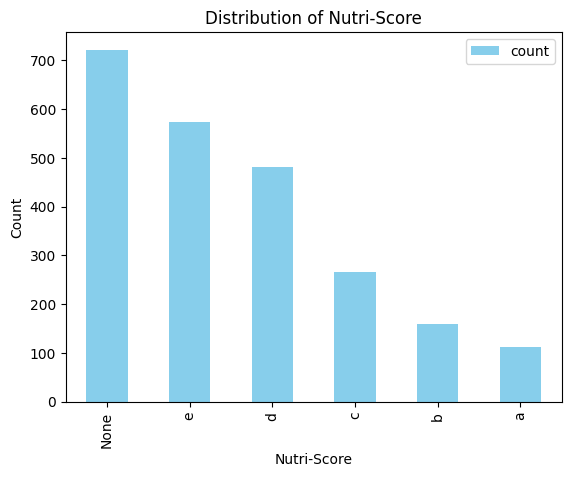

In [11]:
# حساب توزيع Nutri-Score باستخدام groupBy
df.groupBy('nutrition_grade_fr').count().show()

# أو يمكنك استخدام مكتبة Pandas للرسم البياني
import pandas as pd
import matplotlib.pyplot as plt

# تحويل DataFrame إلى Pandas
nutrition_df = df.groupBy('nutrition_grade_fr').count().toPandas()

# رسم الرسم البياني لتوزيع Nutri-Score
plt.figure(figsize=(10, 6))
nutrition_df.plot(kind='bar', x='nutrition_grade_fr', y='count', color='skyblue')
plt.title('Distribution of Nutri-Score')
plt.xlabel('Nutri-Score')
plt.ylabel('Count')
plt.show()


In [12]:
# توزيع عدد المنتجات حسب العلامات التجارية
brand_count = df.groupBy('brands').count().orderBy('count', ascending=False)
brand_count.show(10)


+--------------------+-----+
|              brands|count|
+--------------------+-----+
|              Kroger|  193|
|                NULL|  133|
|Lindt,  Lindt & S...|   91|
|           Mt. Olive|   69|
|      The Kroger Co.|   50|
|Kroger,  The Krog...|   48|
|                Unfi|   43|
|             Emerald|   43|
|   Private Selection|   41|
|  Fresh Foods Market|   37|
+--------------------+-----+
only showing top 10 rows



In [13]:
# إزالة الصفوف التي تحتوي على قيم مفقودة في الأعمدة المهمة
df_cleaned = df.dropna(subset=['product_name', 'nutrition_grade_fr', 'ingredients_text'])

df_cleaned.show(5)


+--------------------------+--------------------+----------------------+------------------+------------------+-----------------+------------------+-------------------+------------------+---------------------------------+--------------------------+---------------------------+------------------+-----------------+--------------+--------------------------+-------------+------------------+-------------+-----------------+---------------------+-------------------+-------------------+-------------+---------------+-------------------+-------------------+-------------------+-------------------+----------------+-------------------+------------------+-------------+---------------+--------------------+------------------+-----------+--------------+------------+---------+------------+------------------+----------------+-----------+--------------+--------------+-------------+------------+------------------+---------------------+-----------+----------+-------------+---------------+-------------+-------

In [14]:
# ملء القيم المفقودة في الأعمدة
df_filled = df.fillna({'ingredients_text': 'Inconnu', 'nutrition_grade_fr': 'N/A'})

df_filled.show(5)


+--------------------------+--------------------+----------------------+------------------+------------------+-----------------+------------------+-------------------+------------------+---------------------------------+--------------------------+---------------------------+------------------+-----------------+--------------+--------------------------+-------------+------------------+-------------+-----------------+---------------------+-------------------+-------------------+-------------+---------------+-------------------+-------------------+-------------------+-------------------+----------------+-------------------+------------------+-------------+---------------+--------------------+------------+-----------+--------------+------------+---------+------------+------------------+----------------+-----------+---------------+---------------+-------------+------------+------------------+---------------------+-----------+----------+-------------+---------------+-------------+-----------

In [16]:
from pyspark.ml.feature import RegexTokenizer, CountVectorizer

# 1. تحويل النص إلى قائمة كلمات باستخدام RegexTokenizer
tokenizer = RegexTokenizer(inputCol="ingredients_text", outputCol="ingredients_tokens", pattern="\\W")
df_tokenized = tokenizer.transform(df_filled)

# 2. استخدام CountVectorizer على القائمة المحوّلة
cv = CountVectorizer(inputCol="ingredients_tokens", outputCol="features")
cv_model = cv.fit(df_tokenized)
df_features = cv_model.transform(df_tokenized)

# 3. عرض النتائج
df_features.select("product_name", "ingredients_tokens", "features").show(5, truncate=False)


+------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------+
|product_name                  |ingredients_tokens                                                                                                                                                          |features                                                                                                                                    |
+------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------

In [19]:
from pyspark.sql.functions import row_number
from pyspark.sql.window import Window

# 1. إزالة null من product_id (code)
df_products = df_cleaned.select("code").dropna().distinct().withColumnRenamed("code", "product_code")

# 2. توليد معرف رقمي لكل منتج (product_id من نوع Integer)
window = Window.orderBy("product_code")
df_products = df_products.withColumn("product_id", row_number().over(window).cast(IntegerType()))

# 3. توليد user_id عشوائي
df_products = df_products.withColumn("user_id", (monotonically_increasing_id() % 100).cast(IntegerType()))

# 4. توليد rating عشوائي
df_ratings = df_products.withColumn("rating", (rand() * 4 + 1).cast(IntegerType()))

# 5. تدريب نموذج ALS
als = ALS(
    maxIter=5,
    regParam=0.01,
    userCol="user_id",
    itemCol="product_id",
    ratingCol="rating",
    coldStartStrategy="drop"
)

model = als.fit(df_ratings)

# 6. عرض التوصيات
user_recommendations = model.recommendForAllUsers(5)
user_recommendations.show(5, truncate=False)


+-------+---------------------------------------------------------------------------------------------+
|user_id|recommendations                                                                              |
+-------+---------------------------------------------------------------------------------------------+
|20     |[{1421, 3.9944305}, {921, 3.9944305}, {521, 3.9944305}, {221, 3.9944305}, {121, 3.9944305}]  |
|40     |[{1341, 3.9932575}, {341, 3.9932575}, {841, 2.9949431}, {441, 2.9949431}, {141, 2.9949431}]  |
|10     |[{1311, 3.9950905}, {1211, 3.9950905}, {1111, 3.9950905}, {611, 3.9950905}, {511, 3.9950905}]|
|50     |[{1151, 3.995638}, {851, 3.995638}, {451, 3.995638}, {151, 3.995638}, {51, 3.995638}]        |
|80     |[{1481, 3.9947329}, {1281, 3.9947329}, {881, 3.9947329}, {581, 3.9947329}, {481, 3.9947329}] |
+-------+---------------------------------------------------------------------------------------------+
only showing top 5 rows



In [20]:
spark.stop()
